In [1]:
import numpy as np

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
import os, glob

### I. 데이터 준비

* 이미지 사이즈 (28*28)로 변경

In [2]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/0923_rpc/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")


# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/0923_rpc/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/0923_rpc/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

1000  images to be resized.
1000  images resized.
가위 이미지 resize 완료!
1000  images to be resized.
1000  images resized.
바위 이미지 resize 완료!
1000  images to be resized.
1000  images resized.
보 이미지 resize 완료!


#### 1) 데이터 읽기
* load_data()함수는 입력으로 이미지가 있는 폴더위치 (예: 0923_rpc)를 받는다
* 가위바위보의 경우 3개의 클래스 즉, 가위: 0, 바위:1, 보:2 로 라벨
* 정규화 (0,1) 

In [3]:
def load_data(img_path, number_of_data=3000):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/0923_rpc"
(x, y)=load_data(image_dir_path)

x_norm = x/255.0   # 입력은 0~1 사이의 값으로 정규화

이미지 개수는 3000 입니다.


#### 2) train, validation, test split

In [4]:
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(x_train.shape, x_val.shape, x_test.shape)

(2250, 28, 28, 3) (450, 28, 28, 3) (300, 28, 28, 3)


라벨:  0


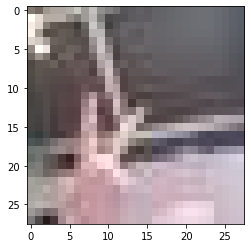

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

print('라벨: ', y_train[0])

### II. Model Building

In [6]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 3)))   # 데이터 크기에 맞게 입력
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))   

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9

### III. Training

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
result = model.fit(x_train, y_train, epochs=10, batch_size=10, validation_data=(x_val,  y_val))

Epoch 1/10
225/225 [==============================] - 4s 5ms/step - loss: 0.8745 - accuracy: 0.6008 - val_loss: 0.1768 - val_accuracy: 0.9467
Epoch 2/10
225/225 [==============================] - 1s 3ms/step - loss: 0.0753 - accuracy: 0.9857 - val_loss: 0.0184 - val_accuracy: 1.0000
Epoch 3/10
225/225 [==============================] - 1s 3ms/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 4/10
225/225 [==============================] - 1s 3ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 5/10
225/225 [==============================] - 1s 3ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 6/10
225/225 [==============================] - 1s 3ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 7/10
225/225 [==============================] - 1s 3ms/step - loss: 7.2258e-04 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Ep

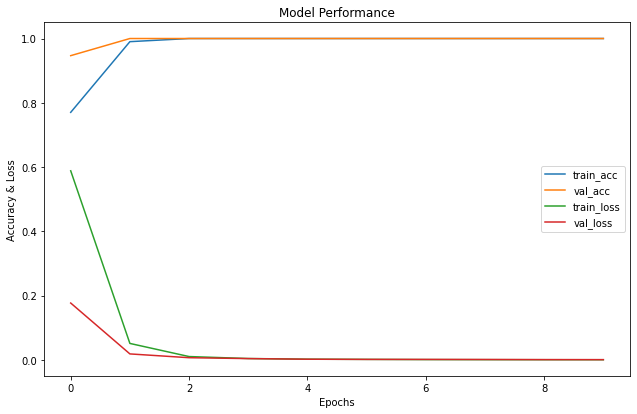

In [8]:
plt.figure(figsize=(10.5, 6.5))

plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])

plt.title('Model Performance')
plt.xlabel('Epochs')
plt.ylabel('Accuracy & Loss')
plt.legend(['train_acc', 'val_acc', 'train_loss', 'val_loss'], loc='center right')

### IV.Test

In [9]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 [==============================] - 2s 91ms/step - loss: 6.1753e-04 - accuracy: 1.0000
test_loss: 0.0006175265298224986 
test_accuracy: 1.0


In [10]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)
val_loss, val_accuracy = model.evaluate(x_val, y_val)

15/15 [==============================] - 1s 60ms/step - loss: 5.7464e-04 - accuracy: 1.0000


In [11]:
print("train_accuracy: {}".format(train_accuracy))
print("val_accuracy: {}".format(val_accuracy))
print("test_accuracy: {}".format(test_accuracy))

train_accuracy: 1.0
val_accuracy: 1.0
test_accuracy: 1.0


#### 느낀 점
* 데이터가 비슷해서 인지 오버피팅의 문제인지 그 외 다른 것의 문제인지 잘 모르겠지만 어디선가 잘못된 점이 있는 것 같다. 
* loss 는 계속 줄어들지만 accuracy는 그렇지 않기 때문에 오버피팅은 아닌 것 같다 (?)  
* train accuracy가 epoch 2만에 0.60에서 0.98, validation set의 accuracy도 0.9에서 1이 나왔다. 
* 시간이 날 때 다시 차근차근 개념을 이해하고 다시 연습해보아야겠다. 